In [1]:
import pandas as pd, numpy as np
from IPython.display import display, HTML
from sklearn.preprocessing import LabelBinarizer #for dummification
import functions as func
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from mlxtend.frequent_patterns import apriori, association_rules #for ARM
import matplotlib.pyplot as plt

#from mlxtend.frequent_patterns import apriori, association_rules #for ARM

rs = 32
data = pd.read_csv('../data/pd_speech_features.csv', skiprows=[0])
data.shape

(756, 755)

<Figure size 360x288 with 0 Axes>

In [2]:
corr_data = func.red_correlations(data, tr=0.75)

##########################################################

data_norm = func.normalize(corr_data, ['class','gender'])

##########################################################

data_smote =func.smote_split(data_norm, 'class',random_state=rs, in_df=False)
df_smote =func.smote_split(data_norm, 'class',random_state=rs, in_df=True)
data_unb = func.split_dataset(data_norm)

trnX, trnY, tstX, tstY, labels = data_smote

returning in dataframe


In [3]:
select = SelectKBest(f_classif, k=10).fit(trnX, trnY)
ind = select.get_support(indices=True)
col = df_smote.columns[ind].tolist()

X_new = select.transform(trnX)
dfk = pd.DataFrame(X_new, columns=col)
dfk.head()

/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,std_5th_deltaMean,std_5th_deltaStd,std_7th_delta,std_7th_delta_delta,std_8th_delta,std_8th_delta_delta,std_9th_delta,std_9th_delta_delta,tqwt_entropy_log_dec_18,tqwt_entropy_log_dec_9Median
0,1.634650e-11,6.858551e-12,1.638690e-11,8.322888e-12,2.084983e-11,8.948460e-12,1.628167e-11,8.003969e-12,-0.000016,-0.000061
1,5.940375e-11,2.801754e-11,4.592561e-11,1.745291e-11,4.272184e-11,2.074360e-11,5.767904e-11,2.660668e-11,-0.000007,-0.000058
2,2.495389e-11,9.802792e-12,3.141537e-11,1.515732e-11,2.760348e-11,1.365309e-11,2.224400e-11,1.143922e-11,-0.000008,-0.000135
3,1.540398e-11,7.106017e-12,2.543046e-11,9.980472e-12,2.644324e-11,9.831854e-12,1.351569e-11,6.107359e-12,-0.000007,-0.000062
4,1.945919e-11,8.292072e-12,2.407406e-11,1.131979e-11,2.649380e-11,1.140354e-11,2.318855e-11,1.157562e-11,-0.000013,-0.000122


In [4]:
df_qcut7 = func.cut(dfk, 7, ['class','id', 'gender'], cut="qcut")
df_qcut5 = func.cut(dfk, 5, ['class','id', 'gender'], cut="qcut")
df_qcut3 = func.cut(dfk, 3, ['class','id', 'gender'], cut="qcut")
df_cut7 = func.cut(dfk, 7, ['class','id', 'gender'], cut="cut")
df_cut5 = func.cut(dfk, 5, ['class','id', 'gender'], cut="cut")
df_cut3 = func.cut(dfk, 3, ['class','id', 'gender'], cut="cut")

df_cut3.head()

,std_5th_deltaMean,std_5th_deltaStd,std_7th_delta,std_7th_delta_delta,std_8th_delta,std_8th_delta_delta,std_9th_delta,std_9th_delta_delta,tqwt_entropy_log_dec_18,tqwt_entropy_log_dec_9Median
0,1,1,1,1,1,1,1,1,3,3
1,1,1,1,1,1,1,1,1,3,3
2,1,1,1,1,1,1,1,1,3,3
3,1,1,1,1,1,1,1,1,3,3
4,1,1,1,1,1,1,1,1,3,3


In [5]:
dummqc7 = func.dummy(df_qcut7, ['class','id','gender'])
dummqc5 = func.dummy(df_qcut5, ['class','id','gender'])
dummqc3 = func.dummy(df_qcut3, ['class','id','gender'])
dummc7 = func.dummy(df_cut7, ['class','id','gender'])
dummc5 = func.dummy(df_cut5, ['class','id','gender'])
dummc3 = func.dummy(df_cut3, ['class','id','gender'])

dummc3.head()

,std_5th_deltaMean_1,std_5th_deltaMean_2,std_5th_deltaMean_3,std_5th_deltaStd_1,std_5th_deltaStd_2,std_5th_deltaStd_3,std_7th_delta_1,std_7th_delta_2,std_7th_delta_3,std_7th_delta_delta_1,...,std_9th_delta_3,std_9th_delta_delta_1,std_9th_delta_delta_2,std_9th_delta_delta_3,tqwt_entropy_log_dec_18_1,tqwt_entropy_log_dec_18_2,tqwt_entropy_log_dec_18_3,tqwt_entropy_log_dec_9Median_1,tqwt_entropy_log_dec_9Median_2,tqwt_entropy_log_dec_9Median_3
0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [6]:
fiqc7 = func.freq_itemsets(dummqc7, minpaterns=100)
fiqc5 = func.freq_itemsets(dummqc5, minpaterns=100)
fiqc3 = func.freq_itemsets(dummqc3, minpaterns=100)
print("\n-------------------------------------------")
fic7 = func.freq_itemsets(dummc7, minpaterns=100)
fic5 = func.freq_itemsets(dummc5, minpaterns=100)
fic3 = func.freq_itemsets(dummc3, minpaterns=100)
fiqc3


Minimum support: 0.10941898913151243
Number of found patterns: 241

Minimum support: 0.16677181699666577
Number of found patterns: 127

Minimum support: 0.28242953648100017
Number of found patterns: 188

-------------------------------------------

Minimum support: 0.6561000000000001
Number of found patterns: 471

Minimum support: 0.7290000000000001
Number of found patterns: 511

Minimum support: 0.9
Number of found patterns: 511


,support,itemsets
0,0.334177,(std_5th_deltaMean_1)
1,0.332911,(std_5th_deltaMean_2)
2,0.332911,(std_5th_deltaMean_3)
3,0.334177,(std_5th_deltaStd_1)
4,0.332911,(std_5th_deltaStd_2)
...,...,...
183,0.286076,"(std_7th_delta_3, std_5th_deltaMean_3, std_8th..."
184,0.283544,"(std_7th_delta_3, std_9th_delta_3, std_8th_del..."
185,0.286076,"(std_7th_delta_3, std_9th_delta_delta_3, std_8..."
186,0.287342,"(std_7th_delta_3, std_9th_delta_delta_3, std_9..."


In [7]:
rulesqc7 = func.assoc_rules(fiqc7, orderby="lift", min_confidence=0.9)
rulesqc5 = func.assoc_rules(fiqc5, orderby="lift", min_confidence=0.9)
rulesqc3 = func.assoc_rules(fiqc3, orderby="lift", min_confidence=0.9)
rulesc7 = func.assoc_rules(fic7, orderby="lift", min_confidence=0.9)
rulesc5 = func.assoc_rules(fic5, orderby="lift", min_confidence=0.9)
rulesc3 = func.assoc_rules(fic3, orderby="lift", min_confidence=0.9)

In [8]:
rulesc3[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
9573,"(std_9th_delta_delta_1, std_8th_delta_delta_1)","(tqwt_entropy_log_dec_18_3, std_5th_deltaMean_...",0.940506,0.932911,0.926582,0.985195,1.056044,0.049173,4.531530,2
14781,"(tqwt_entropy_log_dec_18_3, std_5th_deltaMean_...","(std_9th_delta_delta_1, std_7th_delta_delta_1,...",0.932911,0.940506,0.926582,0.993216,1.056044,0.049173,8.769367,4
11284,"(tqwt_entropy_log_dec_18_3, std_7th_delta_delt...","(std_9th_delta_delta_1, std_8th_delta_delta_1)",0.932911,0.940506,0.926582,0.993216,1.056044,0.049173,8.769367,4
9559,"(std_9th_delta_delta_1, std_5th_deltaMean_1, s...","(tqwt_entropy_log_dec_18_3, std_8th_delta_1, s...",0.940506,0.932911,0.926582,0.985195,1.056044,0.049173,4.531530,3
11295,"(std_9th_delta_delta_1, std_7th_delta_delta_1,...","(tqwt_entropy_log_dec_18_3, std_8th_delta_1, s...",0.940506,0.932911,0.926582,0.985195,1.056044,0.049173,4.531530,3
14803,"(std_9th_delta_delta_1, std_5th_deltaMean_1, s...","(tqwt_entropy_log_dec_18_3, std_7th_delta_delt...",0.940506,0.932911,0.926582,0.985195,1.056044,0.049173,4.531530,3
6102,"(tqwt_entropy_log_dec_18_3, std_8th_delta_1, s...","(std_9th_delta_delta_1, std_8th_delta_delta_1)",0.932911,0.940506,0.926582,0.993216,1.056044,0.049173,8.769367,3
6107,"(std_9th_delta_delta_1, std_8th_delta_delta_1)","(tqwt_entropy_log_dec_18_3, std_8th_delta_1, s...",0.940506,0.932911,0.926582,0.985195,1.056044,0.049173,4.531530,2
14804,"(std_9th_delta_delta_1, std_7th_delta_delta_1,...","(tqwt_entropy_log_dec_18_3, std_5th_deltaMean_...",0.940506,0.932911,0.926582,0.985195,1.056044,0.049173,4.531530,3
9548,"(tqwt_entropy_log_dec_18_3, std_5th_deltaMean_...","(std_9th_delta_delta_1, std_8th_delta_delta_1)",0.932911,0.940506,0.926582,0.993216,1.056044,0.049173,8.769367,4


# -------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

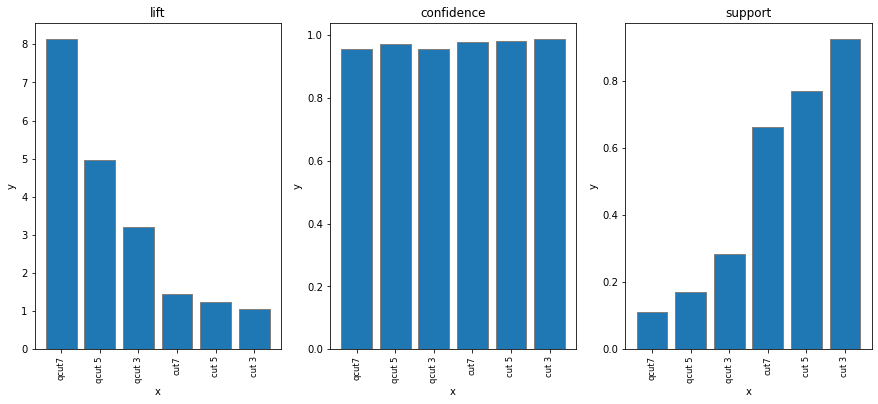

In [9]:
rules = [rulesqc7,rulesqc5, rulesqc3, rulesc7,rulesc5, rulesc3]
rules_n = ["qcut7","qcut 5", "qcut 3", "cut7","cut 5", "cut 3"]
yvalues = []
labels = rules_n
n = 30
metrics = ["lift", "confidence", "support"]

plt.figure()
fig, axs = plt.subplots(1, len(metrics), figsize=(15, 6), squeeze=False)

for i,m in enumerate(metrics):
    for r in rules:
        mean = r.head(n=n)[m].mean()
        yvalues.append(mean)
    func.bar_chart(axs[0, i], xvalues=labels, yvalues=yvalues, xlabel="x", ylabel="y", title=m)
    yvalues=[]

#plt.figure(figsize=(12, 8))
#plt.bar(np.arange(len(rules)), xvalues)
#plt.xticks(np.arange(len(rules)), labels, rotation='vertical')
plt.show()

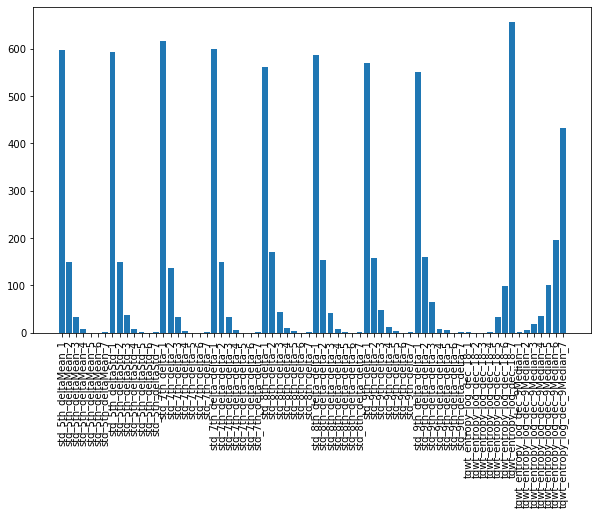

70


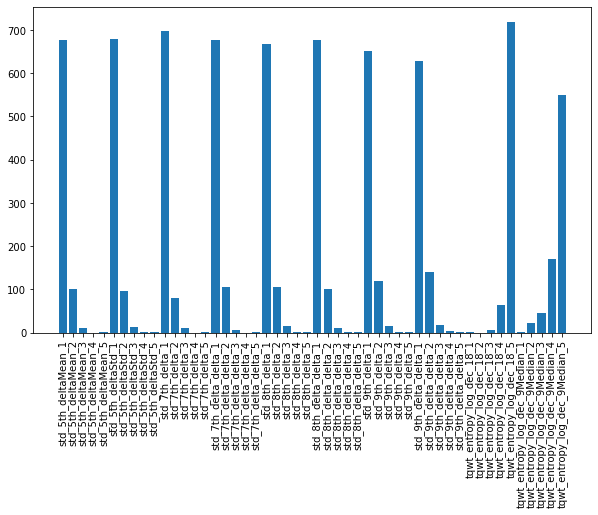

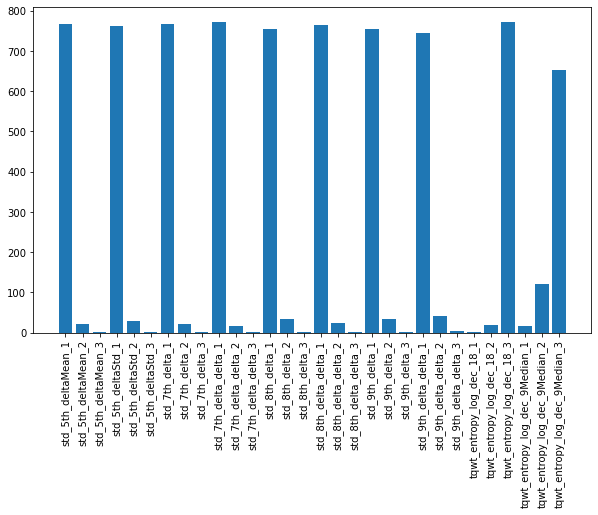

In [10]:
import matplotlib.pyplot as plt
map = {}
for col in list(dummc7): map[col] = (dummc7[col] == 1).sum()
keys = list(map.keys())
freqs = list(map.values())
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(freqs)), freqs)
plt.xticks(np.arange(len(freqs)), keys, rotation='vertical')
plt.show()

print(len(freqs))

#------------------------

map = {}
for col in list(dummc5): map[col] = (dummc5[col] == 1).sum()
keys = list(map.keys())
freqs = list(map.values())
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(freqs)), freqs)
plt.xticks(np.arange(len(freqs)), keys, rotation='vertical')
plt.show()

#--------------------------

map = {}
for col in list(dummc3): map[col] = (dummc3[col] == 1).sum()
keys = list(map.keys())
freqs = list(map.values())
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(freqs)), freqs)
plt.xticks(np.arange(len(freqs)), keys, rotation='vertical')
plt.show()

In [11]:
rulesqc3[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
255,"(std_5th_deltaMean_3, std_7th_delta_delta_3)","(std_7th_delta_3, std_5th_deltaStd_3)",0.300000,0.292405,0.283544,0.945148,3.232323,0.195823,12.900000,2
257,"(std_7th_delta_3, std_5th_deltaStd_3)","(std_5th_deltaMean_3, std_7th_delta_delta_3)",0.292405,0.300000,0.283544,0.969697,3.232323,0.195823,23.100000,2
254,"(std_5th_deltaMean_3, std_7th_delta_3)","(std_7th_delta_delta_3, std_5th_deltaStd_3)",0.305063,0.288608,0.283544,0.929461,3.220499,0.195501,10.085034,2
258,"(std_7th_delta_delta_3, std_5th_deltaStd_3)","(std_5th_deltaMean_3, std_7th_delta_3)",0.288608,0.305063,0.283544,0.982456,3.220499,0.195501,39.611392,2
438,"(std_9th_delta_3, std_7th_delta_delta_3)","(std_9th_delta_delta_3, std_7th_delta_3)",0.297468,0.301266,0.288608,0.970213,3.220454,0.198991,23.457505,2
433,"(std_9th_delta_delta_3, std_7th_delta_3)","(std_9th_delta_3, std_7th_delta_delta_3)",0.301266,0.297468,0.288608,0.957983,3.220454,0.198991,16.720253,2
539,"(std_5th_deltaMean_3, std_7th_delta_delta_3, s...","(std_8th_delta_3, std_7th_delta_3)",0.289873,0.307595,0.286076,0.986900,3.208439,0.196912,52.853586,3
542,"(std_8th_delta_3, std_7th_delta_3)","(std_5th_deltaMean_3, std_7th_delta_delta_3, s...",0.307595,0.289873,0.286076,0.930041,3.208439,0.196912,10.150633,2
636,"(std_9th_delta_delta_3, std_8th_delta_3)","(std_8th_delta_delta_3, std_9th_delta_3, std_7...",0.306329,0.288608,0.283544,0.925620,3.207192,0.195135,9.564276,2
634,"(std_8th_delta_delta_3, std_9th_delta_3, std_7...","(std_9th_delta_delta_3, std_8th_delta_3)",0.288608,0.306329,0.283544,0.982456,3.207192,0.195135,39.539241,3
